In [2]:
#importing numpy
import numpy as np

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [3]:

list_temp=[]
list_PC=[]
list_PE=[]
counter=0
file = open('RMN_31P_fit_1perc_DIM.csv', "r")

for line in file.readlines():

    if counter > 0:
        line_values = line.split()
        values = [float(x) for x in line_values]
        list_temp.append(int(values[0]))
        list_PC.append(values[1])
        list_PE.append(values[2])        
    counter=counter+1


[3.14942527e+02 2.85390784e-01 9.89230023e+01]
[3.11243393e+02 1.99669532e-01 8.64832235e+01]


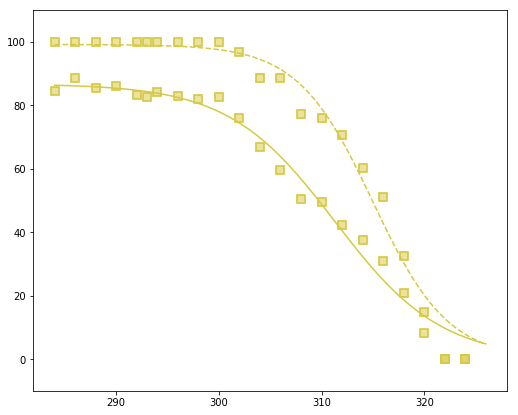

In [27]:
xdata = np.linspace(284, 326, 100)

def sigmoid(x, xo,k, A):
    y = A-A/(1+ np.exp(-k*(x-xo)))
    return y

p_start1=[284,0.3,120]
p_start2=[284,0.3,80]

list_err=[5] * len(list_temp)

popt1, pcov1 = curve_fit(sigmoid, list_temp, list_PC, p0=p_start1, sigma=list_err, bounds=(0, [400.,0.3, 120.]))
popt2, pcov2 = curve_fit(sigmoid, list_temp, list_PE, p0=p_start2, sigma=list_err)


print popt1
print popt2

fig = plt.figure(figsize=(8.5, 7))
ax = fig.add_subplot(111)

# values from Table S3
ax.plot(xdata, sigmoid(xdata, *[315,0.273,99.21]), "--", color=(0.841, 0.79, 0.259))
ax.plot(list_temp, list_PC,'s', markersize=8, mew='1.5', color=(0.841, 0.79, 0.259),alpha=0.5)
ax.plot(list_temp, list_PC,'s', markersize=8, mew='1.5', color=(0.841, 0.79, 0.259),markerfacecolor='none')


# values from Table S3
ax.plot(xdata, sigmoid(xdata, *[311.3,0.1932,86.81]), "-", color=(0.841, 0.79, 0.259))
ax.plot(list_temp, list_PE,'s', markersize=8, mew='1.5', color=(0.841, 0.79, 0.259),alpha=0.5)
ax.plot(list_temp, list_PE,'s', markersize=8, mew='1.5', color=(0.841, 0.79, 0.259),markerfacecolor='none')

plt.ylim(-10,110)

fig.savefig("DIM1_fit.svg", dpi=200)